# <div style="color: DarkCyan">Introduction: Pandas and Matplotlib</div>

# Pandas - Python Data Analysis Library

Pandas is a fast spreading highly versatile library for infrastructure developed in python for _data manipulation, 
filtering, 
sorting, 
grouping, 
aggregating,
de-duplicating,
pivoting,
munging,
deleting,
merging and 
visualizing_

It has also become one of the fast spreading favourite libraries in the world of Data-Scientists, with well over 60% of usage in world wide. Along with _SciKitLearn_ package pandas forms the basis of Data-science for Data-Scientists.

For those familiar with R, Pandas is the attemt to enrich numpy arrays and provide the functionality of R dataframes.

## Creating dataframes
*We need them to store and later on process our data!*

In [1]:
%run ./utils

In [2]:
# Import pandas, numpy and utils
import pandas as pd
import numpy as np

In [3]:
# Set a random seed for repeatable 'random' results
np.random.seed(435)

# From dictionary
df1 = pd.DataFrame({
    "col1": np.random.normal(size=10),
    "col2": np.random.normal(size=10),
    "col3": np.random.normal(size=10)})

display_pandas(df1)

,col1,col2,col3
0,-0.885127,-0.878302,0.430350
1,-0.528875,0.338431,0.500805
2,-0.062892,0.263928,-1.922481
3,1.330022,-0.881749,-0.533148
4,0.045693,-0.679740,-1.095259
5,0.057812,-0.869512,-0.070121
6,0.184987,-0.402919,-1.255048
7,0.878082,1.688775,-0.123375
8,-0.098337,-1.814645,0.758881
9,1.788674,-0.337234,-0.973638


In [4]:
np.random.seed(4324)

# From multidimentional numpy array
df2 = pd.DataFrame(
    np.random.normal(size=[10, 5]), 
    columns=["col{}".format(i) for i in range(4, 9)])

display_pandas(df2)

,col4,col5,col6,col7,col8
0,0.968952,-0.674451,0.120565,-0.824784,-0.951625
1,0.478320,-1.618474,1.063660,-0.489418,0.697533
2,0.472902,0.532588,0.866714,0.230391,-1.511734
3,0.028452,0.007011,-0.310071,-0.633543,-0.424929
4,2.140764,1.373352,1.376347,0.063722,-0.232525
5,-0.539222,-1.119153,0.911209,1.197118,0.298669
6,0.677854,0.118342,0.162064,0.323420,-0.067221
7,0.303175,1.999849,0.144212,-0.561671,-0.228269
8,-1.863637,1.917016,0.310007,-1.502813,-3.060611
9,0.706010,-0.091422,0.859582,-0.128518,-0.176511


### <div style="color: darkred">Exercise 1: Generate a 4x4 identity matrix dataframe</div>

In [8]:
identity_matrix = pd.DataFrame(np.identity(4))


res = identity_matrix
validate_assumptions(
    res,
    (lambda: type(res) == pd.core.frame.DataFrame, "Result must be data frame!"),
    (lambda: res.shape == (4,4), "Shape of the data frame must be 4x4!"),
    (lambda: (res == [[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]).values.sum() == 16, "Not the identity matrix!"))


Correct!

Your result is:




,0,1,2,3
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0


### Filtering
*We might not need all the data!*

In [10]:
# Rows
display_pandas(df2[df2.col4 < 0.5])

,col4,col5,col6,col7,col8
1,0.478320,-1.618474,1.063660,-0.489418,0.697533
2,0.472902,0.532588,0.866714,0.230391,-1.511734
3,0.028452,0.007011,-0.310071,-0.633543,-0.424929
5,-0.539222,-1.119153,0.911209,1.197118,0.298669
7,0.303175,1.999849,0.144212,-0.561671,-0.228269
8,-1.863637,1.917016,0.310007,-1.502813,-3.060611


In [11]:
# Columns
display_pandas(df2[["col5", "col6"]])

,col5,col6
0,-0.674451,0.120565
1,-1.618474,1.063660
2,0.532588,0.866714
3,0.007011,-0.310071
4,1.373352,1.376347
5,-1.119153,0.911209
6,0.118342,0.162064
7,1.999849,0.144212
8,1.917016,0.310007
9,-0.091422,0.859582


In [12]:
# Indices
display_pandas(df2[3:9])

,col4,col5,col6,col7,col8
3,0.028452,0.007011,-0.310071,-0.633543,-0.424929
4,2.140764,1.373352,1.376347,0.063722,-0.232525
5,-0.539222,-1.119153,0.911209,1.197118,0.298669
6,0.677854,0.118342,0.162064,0.323420,-0.067221
7,0.303175,1.999849,0.144212,-0.561671,-0.228269
8,-1.863637,1.917016,0.310007,-1.502813,-3.060611


### <div style="color: darkred">Exercise 2: Select the rows of df2 whose sum is greater than 0</div>

In [13]:
df2_greater_than_0 = df2[df2.sum(axis=1) > 0]


res = df2_greater_than_0
validate_assumptions(
    res,
    (lambda: (res.sum(axis=1) > 0).prod() == 1, "Sums must be greater than 0!"))


Correct!

Your result is:




,col4,col5,col6,col7,col8
1,0.478320,-1.618474,1.063660,-0.489418,0.697533
2,0.472902,0.532588,0.866714,0.230391,-1.511734
4,2.140764,1.373352,1.376347,0.063722,-0.232525
5,-0.539222,-1.119153,0.911209,1.197118,0.298669
6,0.677854,0.118342,0.162064,0.323420,-0.067221
7,0.303175,1.999849,0.144212,-0.561671,-0.228269
9,0.706010,-0.091422,0.859582,-0.128518,-0.176511


### Transforming
*We might need to change the data!*

In [15]:
# Whole dataframe
display_pandas(df1.apply(lambda x: x ** 10))

,col1,col2,col3
0,2.951595e-01,0.273173,2.178808e-04
1,1.712112e-03,0.000020,9.924045e-04
2,9.681125e-13,0.000002,6.896385e+02
3,1.732167e+01,0.284087,1.855575e-03
4,3.967039e-14,0.021059,2.484088e+00
5,4.170623e-13,0.247032,2.873769e-12
6,4.692594e-08,0.000113,9.696224e+00
7,2.724894e-01,188.676005,8.170852e-10
8,8.456178e-11,387.182877,6.334876e-02
9,3.352059e+02,0.000019,7.655513e-01


In [17]:
# Single column
df1_copy = df1.copy()
df1_copy.col1 = df1_copy.col1.apply(lambda x: x ** 10)
display_pandas(df1_copy)

,col1,col2,col3
0,2.951595e-01,-0.878302,0.430350
1,1.712112e-03,0.338431,0.500805
2,9.681125e-13,0.263928,-1.922481
3,1.732167e+01,-0.881749,-0.533148
4,3.967039e-14,-0.679740,-1.095259
5,4.170623e-13,-0.869512,-0.070121
6,4.692594e-08,-0.402919,-1.255048
7,2.724894e-01,1.688775,-0.123375
8,8.456178e-11,-1.814645,0.758881
9,3.352059e+02,-0.337234,-0.973638


### <div style="color: darkred">Exercise 3: Replace each negative value of df2 with 0</div>

In [20]:
df2_positive = df2.where(df2 > 0, 0)


res = df2_positive
validate_assumptions(
    res,
    (lambda: (res >= 0).prod().prod() == 1, "All values must be >= 0!"))


Correct!

Your result is:




,col4,col5,col6,col7,col8
0,0.968952,0.000000,0.120565,0.000000,0.000000
1,0.478320,0.000000,1.063660,0.000000,0.697533
2,0.472902,0.532588,0.866714,0.230391,0.000000
3,0.028452,0.007011,0.000000,0.000000,0.000000
4,2.140764,1.373352,1.376347,0.063722,0.000000
5,0.000000,0.000000,0.911209,1.197118,0.298669
6,0.677854,0.118342,0.162064,0.323420,0.000000
7,0.303175,1.999849,0.144212,0.000000,0.000000
8,0.000000,1.917016,0.310007,0.000000,0.000000
9,0.706010,0.000000,0.859582,0.000000,0.000000


### Concatenating dataframes
*Because we will need to merge different datasets!*

In [21]:
# Horizontally
display_pandas(pd.concat([df1, df2], axis=1))

,col1,col2,col3,col4,col5,col6,col7,col8
0,-0.885127,-0.878302,0.430350,0.968952,-0.674451,0.120565,-0.824784,-0.951625
1,-0.528875,0.338431,0.500805,0.478320,-1.618474,1.063660,-0.489418,0.697533
2,-0.062892,0.263928,-1.922481,0.472902,0.532588,0.866714,0.230391,-1.511734
3,1.330022,-0.881749,-0.533148,0.028452,0.007011,-0.310071,-0.633543,-0.424929
4,0.045693,-0.679740,-1.095259,2.140764,1.373352,1.376347,0.063722,-0.232525
5,0.057812,-0.869512,-0.070121,-0.539222,-1.119153,0.911209,1.197118,0.298669
6,0.184987,-0.402919,-1.255048,0.677854,0.118342,0.162064,0.323420,-0.067221
7,0.878082,1.688775,-0.123375,0.303175,1.999849,0.144212,-0.561671,-0.228269
8,-0.098337,-1.814645,0.758881,-1.863637,1.917016,0.310007,-1.502813,-3.060611
9,1.788674,-0.337234,-0.973638,0.706010,-0.091422,0.859582,-0.128518,-0.176511


In [22]:
# Vertically
display_pandas(pd.concat([df1, df1], axis=0))

,col1,col2,col3
0,-0.885127,-0.878302,0.430350
1,-0.528875,0.338431,0.500805
2,-0.062892,0.263928,-1.922481
3,1.330022,-0.881749,-0.533148
4,0.045693,-0.679740,-1.095259
5,0.057812,-0.869512,-0.070121
6,0.184987,-0.402919,-1.255048
7,0.878082,1.688775,-0.123375
8,-0.098337,-1.814645,0.758881
9,1.788674,-0.337234,-0.973638


### <div style="color: darkred">Exercise 4: Repeat df2 30 times vertically</div>

In [25]:
df2_times_30 = pd.concat(30*[df2])


res = df2_times_30
validate_assumptions(
    res,
    (lambda: res.shape == (300,5), "Shape must be (300, 5)!"))


Correct!

Your result is:




,col4,col5,col6,col7,col8
0,0.968952,-0.674451,0.120565,-0.824784,-0.951625
1,0.478320,-1.618474,1.063660,-0.489418,0.697533
2,0.472902,0.532588,0.866714,0.230391,-1.511734
3,0.028452,0.007011,-0.310071,-0.633543,-0.424929
4,2.140764,1.373352,1.376347,0.063722,-0.232525
5,-0.539222,-1.119153,0.911209,1.197118,0.298669
6,0.677854,0.118342,0.162064,0.323420,-0.067221
7,0.303175,1.999849,0.144212,-0.561671,-0.228269
8,-1.863637,1.917016,0.310007,-1.502813,-3.060611
9,0.706010,-0.091422,0.859582,-0.128518,-0.176511


### Convert between wide and long format (pivoting and melting)

In [26]:
np.random.seed(42)

df3 = pd.DataFrame({
    "gender": ["female", "male", "male", "female", "male", "male", "female", "female", "male", "male","female", "male", "female", "female", "female"], 
    "age": np.random.randint(10, 70, 15),
    "education": ["highschool", "university", "highschool", "university", "highschool", "highschool","highschool", "university", "university", "highschool", "highschool", "university", "university", "highschool", "highschool"]})

In [17]:
display_pandas(df3)

,age,education,gender
0,48,highschool,female
1,61,university,male
2,38,highschool,male
3,24,university,female
4,52,highschool,male
5,17,highschool,male
6,30,highschool,female
7,48,university,female
8,67,university,male
9,28,highschool,male


In [31]:
# Pivoting
df3_pivoted = df3.pivot_table(index="gender", columns="education", values="age", aggfunc="mean")
display_pandas(df3_pivoted)

education,highschool,university
gender,,
female,41.00,30.666667
male,33.75,49.333333


In [32]:
# Melting
display_pandas(df3_pivoted.reset_index().melt(id_vars=["gender"], value_vars=df3_pivoted.columns, value_name="age"))

,gender,education,age
0,female,highschool,41.000000
1,male,highschool,33.750000
2,female,university,30.666667
3,male,university,49.333333


### <div style="color: darkred">Exercise 5: Convert df3 to long format with columns  the 'gender's, value 'age' and without aggregation</div>

In [38]:
pivoted_by_education = (df3
    .reset_index()
    .pivot_table(index=["index", "education"], columns="gender", values="age")
    .reset_index()
    .drop(columns=["index"]))

res = pivoted_by_education
validate_assumptions(
    res,
    (lambda: res.shape == (15,3), "Shape must be (15, 3)!"),
    (lambda: res.female.sum() == 297.0, "Sum of female column should be 297.0"))


Correct!

Your result is:




gender,education,female,male
0,highschool,48.0,NaN
1,university,NaN,61.0
2,highschool,NaN,38.0
3,university,24.0,NaN
4,highschool,NaN,52.0
5,highschool,NaN,17.0
6,highschool,30.0,NaN
7,university,48.0,NaN
8,university,NaN,67.0
9,highschool,NaN,28.0


## Introducing Matplotlib - Pyplot

In [39]:
# Import the plotting tools
import matplotlib.pyplot as plt
from matplotlib import pyplot, pylab

### Line plot
*Because we will need to plot time-series, learning curves, ...*

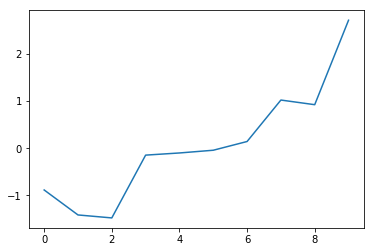

In [40]:
# Single line
plt.clf() # We need this to make sure the state of matplotlib is empty and graphs don't overlap in databricks

plt.plot(df1.col1.cumsum())

plt.show()

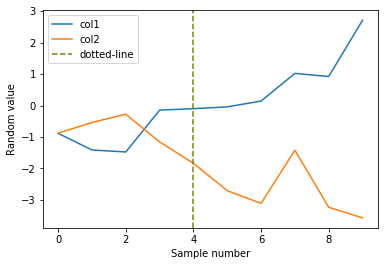

In [41]:
# Legends, labels, multiple lines
plt.clf()

plt.plot(df1.col1.cumsum())
plt.plot(df1.col2.cumsum())
plt.axvline(4, ls="--", color="olive")

plt.legend(["col1", "col2", "dotted-line"])
plt.ylabel("Random value")
plt.xlabel("Sample number")

plt.show()

### <div style="color: darkred">Exercise 6: Plot the diagonal line from 0 to 99</div>

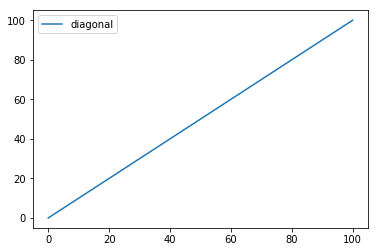

In [42]:
plt.clf()

plt.plot(range(101))

plt.legend(["diagonal"])

plt.show()

### Scatter plot
*Since we will will be visualizing the correlation between variables, Q-Q plots, ...*

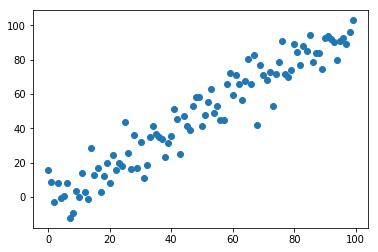

In [43]:
# Single x-axis variable
plt.clf()

plt.scatter(np.arange(100), np.arange(100) + np.random.normal(size=100, scale=10))

plt.show()

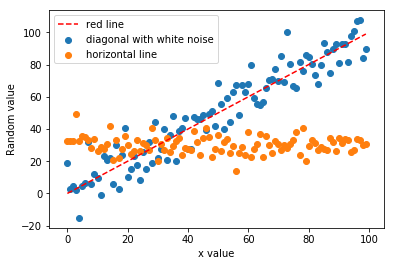

In [44]:
# Legends, labels, multiple x-axis variables
plt.clf()

plt.scatter(np.arange(100), np.arange(100) + np.random.normal(size=100, scale=10))
plt.scatter(np.arange(100), np.random.normal(size=100, loc=30, scale=5))

plt.plot(range(100), range(100), ls="--", color="red")

plt.legend(["red line", "diagonal with white noise", "horizontal line"])
plt.ylabel("Random value")
plt.xlabel("x value")

plt.show()

### <div style="color: darkred">Exercise 7: Plot $y = x ^ 2 + 2$ in the interval $[-1, 1]$ and with white noise of $\mu = 0, \sigma = 0.05$</div>

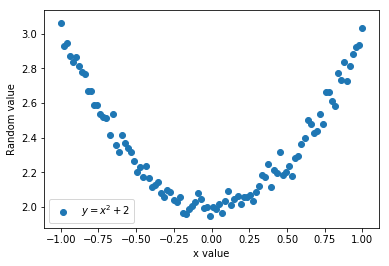

In [45]:
# Legends, labels, multiple x-axis variables
plt.clf()

plt.scatter(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100) ** 2 + 2 + np.random.normal(size=100, scale=0.05))

plt.legend(["$y = x ^ 2 + 2$"])
plt.ylabel("Random value")
plt.xlabel("x value")

plt.show()

### Bar plot
*We will plot frequencies, compare variables, ...*

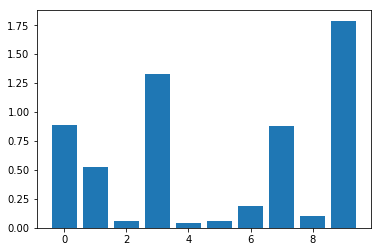

In [46]:
# Single variable
plt.clf()

plt.bar(df1.index, df1.col1.abs())

plt.show()

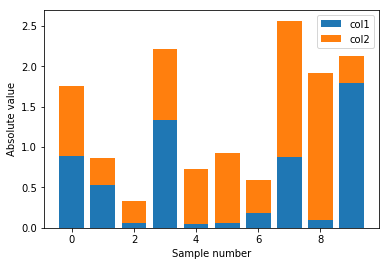

In [47]:
# Legends, labels, multiple bars stacked
plt.clf()

plt.bar(df1.index, df1.col1.abs())
plt.bar(df1.index, df1.col2.abs(), bottom=df1.col1.abs())

plt.legend(["col1", "col2"])
plt.xlabel("Sample number")
plt.ylabel("Absolute value")

plt.show()

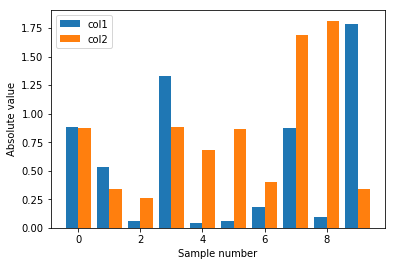

In [48]:
# Multiple variables 
plt.clf()

bar_width = 0.4

plt.bar(df1.index - bar_width / 2, df1.col1.abs(), width=bar_width)
plt.bar(df1.index + bar_width / 2, df1.col2.abs(), width=bar_width)

plt.legend(["col1", "col2"])
plt.xlabel("Sample number")
plt.ylabel("Absolute value")

plt.show()

### Histogram
*As we want to study distributions...*

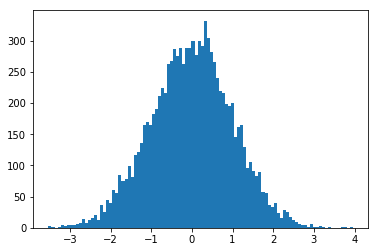

In [49]:
# Single value
np.random.seed(4324)
plt.clf()

plt.hist(np.random.normal(size=10000), bins=100)

plt.show()

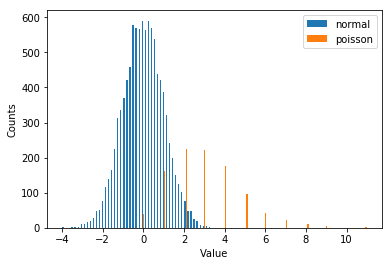

In [50]:
# Legend, labels, multiple values
np.random.seed(64363)
plt.clf()

plt.hist([np.random.normal(size=10000),np.random.poisson(lam=3, size=1000)], bins=100)

plt.legend(["normal", "poisson"])
plt.xlabel("Value")
plt.ylabel("Counts")

plt.show()

### Box plot
*To compare data sets.*

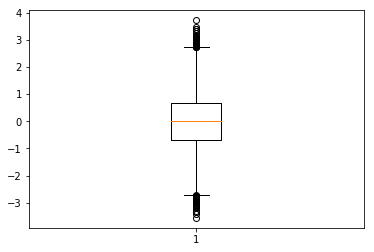

In [34]:
# Single variable
np.random.seed(4353)
plt.clf()

plt.boxplot(np.random.normal(size=10000))

plt.show()

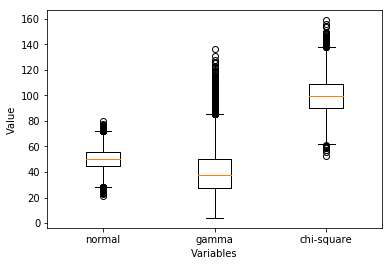

In [35]:
# Legend, labels, multiple variables
np.random.seed(4353)
plt.clf()

np.random.chisquare

np.random.gamma

plt.boxplot([
    np.random.normal(loc=50, scale=8, size=10000), 
    np.random.gamma(5, scale=8, size=10000),
    np.random.chisquare(df=100, size=10000)])

plt.xticks([1, 2, 3], ["normal", "gamma", "chi-square"])
plt.xlabel("Variables")
plt.ylabel("Value")

plt.show()

### Plot from pandas dataframe
*Because we are too lazy to use matplotlib!*

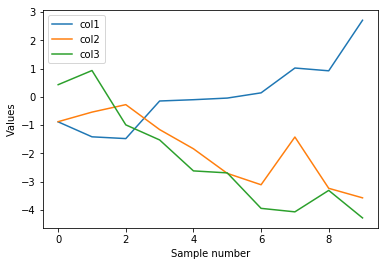

In [36]:
# Line
plt.clf()

plot = df1.cumsum().plot()

plot.set_xlabel("Sample number")
plot.set_ylabel("Values")

plt.show()

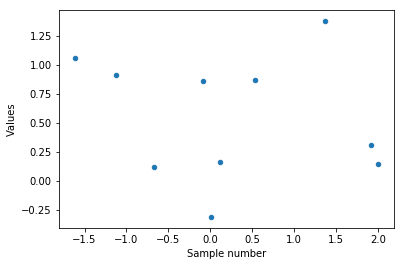

In [37]:
# Scatter plot
plt.clf()

plot = df2.plot(kind="scatter", x="col5", y="col6")

plot.set_xlabel("Sample number")
plot.set_ylabel("Values")

plt.show()

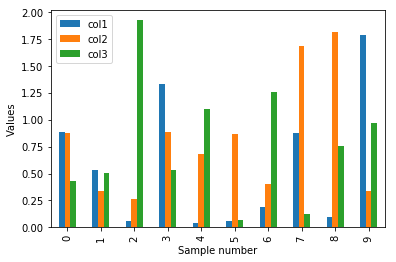

In [38]:
# Bar plot
plt.clf()

plot = df1.abs().plot(kind="bar")

plot.set_xlabel("Sample number")
plot.set_ylabel("Values")

plt.show()

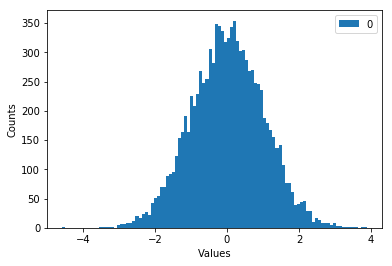

In [39]:
# Histogram
plt.clf()

plot = pd.DataFrame(np.random.normal(size=10000)).plot(kind="hist", bins=100)

plot.set_xlabel("Values")
plot.set_ylabel("Counts")

plt.show()

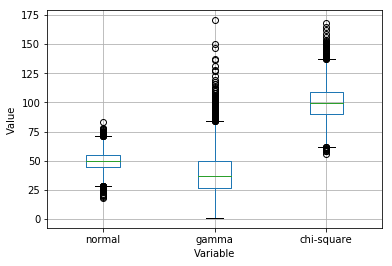

In [40]:
# Box plot
plt.clf()

df = pd.DataFrame(
    np.array([np.random.normal(loc=50, scale=8, size=10000), 
     np.random.gamma(5, scale=8, size=10000),
     np.random.chisquare(df=100, size=10000)]).T, 
    columns=["normal", "gamma", "chi-square"])

plot = df.boxplot()

plot.set_xlabel("Variable")
plot.set_ylabel("Value")

plt.show()

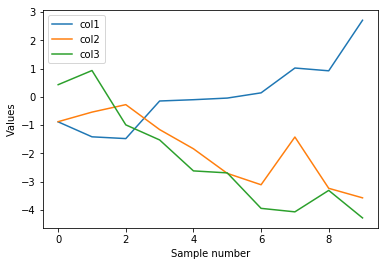

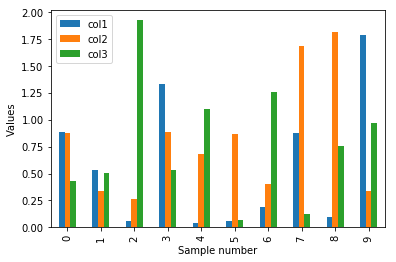

In [41]:
# Multiple graphs
plt.clf()

plot1 = df1.cumsum().plot()
plot1.set_xlabel("Sample number")
plot1.set_ylabel("Values")

plot2 = df1.abs().plot(kind="bar")
plot2.set_xlabel("Sample number")
plot2.set_ylabel("Values")

plt.show()

### <div style="color: darkred">Exercise 8: Plot the scatter plots of all combinations of columns of df2</div>

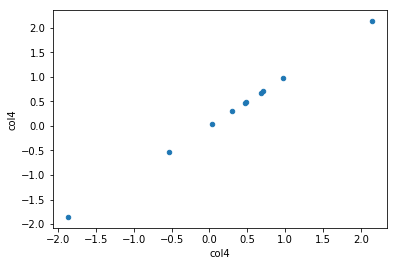

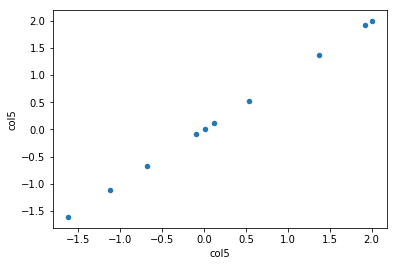

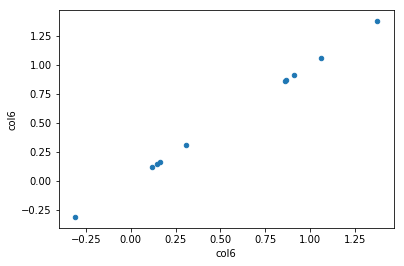

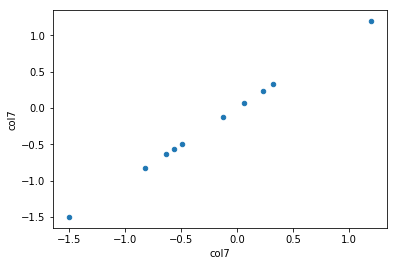

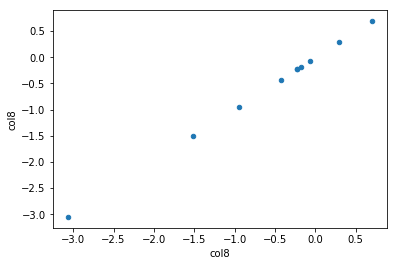

In [42]:
plt.clf()

for column1, column2 in zip(df2.columns, df2.columns):
    plot2 = df2.plot(kind="scatter", x=column1, y=column2)
    plot2.set_xlabel(column1)
    plot2.set_ylabel(column2)

plt.show()